### SQL E-R diagram

- Datatype are defined for use in Sqlite3
- Selected the most simple SQL database, due to the fact that the dataset is largely text-heavy, unstructured.
- Illustrated an ideal, to-be structure below, but failed to implement in code
- Some data couldn't be gathered with web scraping - the offical Reddit API provides full information.
- Some partial dependency is remaining (so not perfectly normalized) but seems reasonable enough.

In [2]:
import iplantuml

Writing output for /root/work/notebook/87b57401-ab02-4bf2-9fbc-d2b10fc7920d.uml to 87b57401-ab02-4bf2-9fbc-d2b10fc7920d.svg


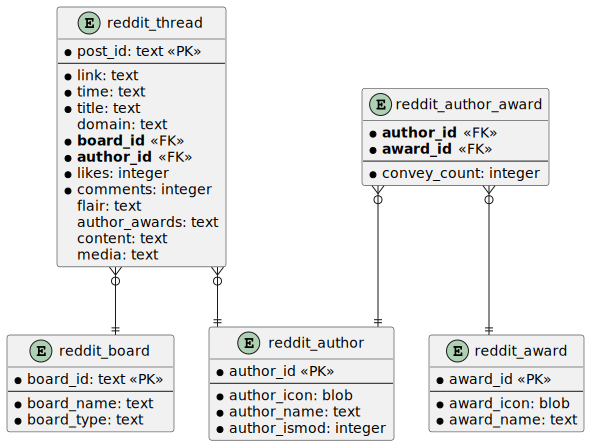

In [3]:
%%plantuml 

@startuml

/'
Entity Relationship Diagram (ERD)
https://plantuml.com/en/ie-diagram
'/

'To avoid problems with angled crows feet
skinparam linetype ortho


'===============
'Tables
'===============

'Where the post is submitted - that is, subreddit
entity reddit_board {
    * board_id: text <<PK>>
    --
    * board_name: text
    * board_type: text
}

'Individual reddit posts uploaded to subreddit
'- Each subreddit has its own table
entity reddit_thread {
    * post_id: text <<PK>>
    --
    * link: text
    * time: text
    * title: text
    domain: text
    * **board_id** <<FK>>
    * **author_id** <<FK>>
    * likes: integer
    * comments: integer
    flair: text
    author_awards: text
    content: text
    media: text
}

'Author of a post
'- author_ismod: Whether the author belongs to moderator group of subreddit
entity reddit_author {
    * author_id <<PK>>
    --
    * author_icon: blob
    * author_name: text
    * author_ismod: integer
}

'Award defined
entity reddit_award {
    * award_id <<PK>>
    --
    * award_icon: blob
    * award_name: text
}

'All awards conveyed to authors
entity reddit_author_award {
    * **author_id** <<FK>>
    * **award_id** <<FK>>
    --
    * convey_count: integer
}


'===============
'Realtionships
'===============

'For reference:
'entity }|..|| entity Non-identifying & mandatory
'entity }o..o| entity Non-identifying & optional
'entity ||--o{ entity Identifying

reddit_thread }o--|| reddit_board
reddit_thread }o--|| reddit_author

'N-M relationship between author and award
reddit_author_award }o--|| reddit_author
reddit_author_award }o--|| reddit_award 

@enduml 

### NoSQL mappings

Some comments:
- Both "awards" and "media" are iterative object (dict and list respectively) but stored as text upon json serializing
- It makes easier to unpack the information later while database structure can be simplified.
- Most of "string" fields are set to "keyword" type, while title, content are "text" fields

[Reference] \
Differences between type "keyword" and "text" in ElasticSearch are found at: \
https://codecurated.com/blog/elasticsearch-text-vs-keyword/

- ElasticSearch will analyze "text" before it's stored, while won't "keyword".
Use "keyword" field data type if:
- You want an exact match query
- You want to use it for wildcard query

Use "text" field data type if:
- You want to create an autocomplete
- You want to create a search system

In [4]:
import json

with open("NoSQLmap.json", "r") as f:
    json_data = json.load(f)
    
print(json.dumps(json_data, indent=2))

{
  "mappings": {
    "properties": {
      "post_id": {
        "type": "keyword"
      },
      "link": {
        "type": "keyword"
      },
      "time": {
        "type": "date",
        "format": "yyyy-MM-dd'T'HH:mm:ss+00:00"
      },
      "title": {
        "type": "text"
      },
      "domain": {
        "type": "text"
      },
      "board_name": {
        "type": "keyword"
      },
      "board_id": {
        "type": "keyword"
      },
      "board_type": {
        "type": "keyword"
      },
      "author_name": {
        "type": "keyword"
      },
      "author_id": {
        "type": "keyword"
      },
      "author_ismod": {
        "type": "boolean"
      },
      "likes": {
        "type": "integer"
      },
      "comments": {
        "type": "integer"
      },
      "flair": {
        "type": "keyword"
      },
      "author_awards": {
        "type": "text"
      },
      "content": {
        "type": "text"
      },
      "media": {
        "type": "keyword"
      }
 